<a href="https://colab.research.google.com/github/sreehariar04/test_new/blob/main/sreehari_preprocess_cs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
house_pricing  = pd.read_csv('/content/House_Pricing.csv')

In [ ]:
house_pricing.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [ ]:
house_pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

# Check for Duplicates

In [ ]:
house_pricing.duplicated().sum()

np.int64(0)

In [ ]:
duplicate_columns = house_pricing.columns[house_pricing.T.duplicated()]
duplicate_columns

Index([], dtype='object')

Check for Missing Values

In [ ]:
house_pricing.isna().sum()

,0
ID,0
Date House was Sold,0
Sale Price,4
No of Bedrooms,0
No of Bathrooms,4
Flat Area (in Sqft),9
Lot Area (in Sqft),9
No of Floors,0
Waterfront View,0
No of Times Visited,19489


In [ ]:
house_pricing.drop(columns =['No of Times Visited'], inplace=True,axis = 1)

In [ ]:
house_pricing.dropna(subset=['Zipcode','Latitude','Longitude','Living Area after Renovation (in Sqft)'], inplace=True) # drop columns with only one missing value

Fill Missing Values with median values

In [ ]:
# Numerical columns
num_cols = house_pricing.select_dtypes(include=['int64', 'float64']).columns

# Categorical columns
cat_cols = house_pricing.select_dtypes(include=['object']).columns


In [ ]:
num_cols

Index(['ID', 'Sale Price', 'No of Bedrooms', 'No of Bathrooms',
       'Flat Area (in Sqft)', 'Lot Area (in Sqft)', 'No of Floors',
       'Overall Grade', 'Area of the House from Basement (in Sqft)',
       'Basement Area (in Sqft)', 'Age of House (in Years)', 'Renovated Year',
       'Zipcode', 'Latitude', 'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)'],
      dtype='object')

In [ ]:
cat_cols

Index(['Date House was Sold', 'Waterfront View', 'Condition of the House'], dtype='object')

In [ ]:
house_pricing[num_cols] = house_pricing[num_cols].fillna(house_pricing[num_cols].median()) #numerical columns with median

In [ ]:
house_pricing[cat_cols] = house_pricing[cat_cols].fillna(house_pricing[cat_cols].mode().iloc[0]) # categorical columns with mode

In [ ]:
house_pricing.isna().sum()

,0
ID,0
Date House was Sold,0
Sale Price,0
No of Bedrooms,0
No of Bathrooms,0
Flat Area (in Sqft),0
Lot Area (in Sqft),0
No of Floors,0
Waterfront View,0
Condition of the House,0


### Outlier Detection



<Axes: >

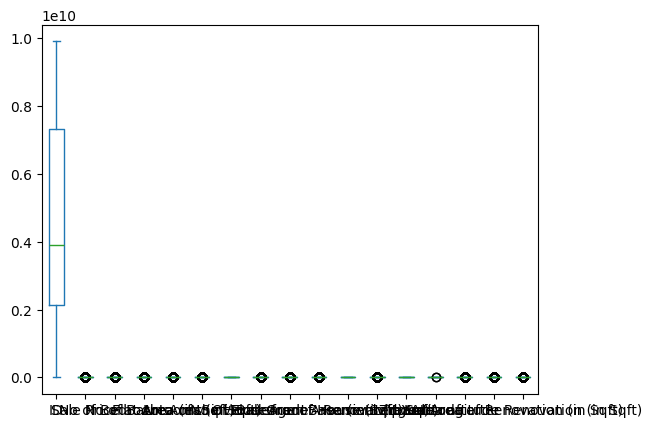

In [ ]:
house_pricing.plot(kind='box')

In [ ]:
numeric_cols = (
    house_pricing
    .select_dtypes(include='number')
    .columns
    .drop('Sale Price', errors='ignore')
)



In [ ]:
outlier_summary = {}

for col in numeric_cols:
    Q1 = house_pricing[col].quantile(0.25)
    Q3 = house_pricing[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = house_pricing[(house_pricing[col] < lower) | (house_pricing[col] > upper)]
    outlier_summary[col] = outliers.shape[0]

outlier_summary


{'ID': 0,
 'No of Bedrooms': 546,
 'No of Bathrooms': 571,
 'Flat Area (in Sqft)': 572,
 'Lot Area (in Sqft)': 2423,
 'No of Floors': 0,
 'Overall Grade': 1911,
 'Area of the House from Basement (in Sqft)': 610,
 'Basement Area (in Sqft)': 496,
 'Age of House (in Years)': 0,
 'Renovated Year': 913,
 'Zipcode': 0,
 'Latitude': 2,
 'Longitude': 256,
 'Living Area after Renovation (in Sqft)': 544,
 'Lot Area after Renovation (in Sqft)': 2193}

# Remove Outliers

In [ ]:
house_pricing_clean = house_pricing.copy()

for col in numeric_cols:
    Q1 = house_pricing_clean[col].quantile(0.25)
    Q3 = house_pricing_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    house_pricing_clean[col] = house_pricing_clean[col].clip(lower, upper)


    house_pricing.shape, house_pricing_clean.shape


Sale Price includes high values ..log transformation is used

In [ ]:
import numpy as np
house_pricing_clean['Sale Price'] = np.log1p(house_pricing['Sale Price'])

In [ ]:
house_pricing_clean['Sale Price'].shape

(21609,)

In [ ]:
iqr_cols = (
    house_pricing_clean
    .select_dtypes(include='number')
    .columns
    .drop('Sale Price')
)

for col in iqr_cols:
    Q1 = house_pricing_clean[col].quantile(0.25)
    Q3 = house_pricing_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    print(col, ((house_pricing_clean[col] < lower) |
                (house_pricing_clean[col] > upper)).sum())


ID 0
No of Bedrooms 0
No of Bathrooms 0
Flat Area (in Sqft) 0
Lot Area (in Sqft) 0
No of Floors 0
Overall Grade 0
Area of the House from Basement (in Sqft) 0
Basement Area (in Sqft) 0
Age of House (in Years) 0
Renovated Year 0
Zipcode 0
Latitude 0
Longitude 0
Living Area after Renovation (in Sqft) 0
Lot Area after Renovation (in Sqft) 0


# Encoding

In [ ]:
cat_cols1 = house_pricing_clean.select_dtypes(include='object').columns #identify categorical columns
cat_cols1


Index(['Date House was Sold', 'Waterfront View', 'Condition of the House'], dtype='object')

In [ ]:
house_pricing_encoded = pd.get_dummies(
    house_pricing_scaled,
    columns=cat_cols1,
    drop_first=True
)

In [ ]:
house_pricing_encoded.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Date House was Sold_15 April 2016,Date House was Sold_15 February 2016,Date House was Sold_15 January 2016,Date House was Sold_15 March 2016,Date House was Sold_15 May 2016,Waterfront View_Yes,Condition of the House_Excellent,Condition of the House_Fair,Condition of the House_Good,Condition of the House_Okay
0,0.886275,12.309987,-0.424845,-1.521594,-1.046636,-0.605572,-0.915437,-0.595309,-0.771799,-0.681058,...,False,False,False,False,False,False,False,True,False,False
1,0.637634,13.195616,-0.424845,0.209914,0.610367,-0.289986,0.936434,-0.595309,0.524212,0.278015,...,False,False,False,False,False,False,False,True,False,False
2,0.365562,12.100718,-1.595673,-1.521594,-1.535392,0.256737,-0.915437,-1.593797,-1.308530,-0.681058,...,False,True,False,False,False,False,False,True,False,False
3,-0.727559,13.311331,0.745984,1.248819,-0.116807,-0.734422,-0.915437,-0.595309,-0.941982,1.500833,...,False,False,False,False,False,False,True,False,False,False
4,-0.912788,13.142168,-0.424845,-0.136388,-0.450592,-0.123868,-0.915437,0.403180,-0.117248,-0.681058,...,False,True,False,False,False,False,False,True,False,False


# **Standard Scaling**

In [ ]:
target = 'Sale Price'
# Numerical features
num_cols1 = (house_pricing_clean.select_dtypes(include=['int64', 'float64']).columns.drop(target))

# Categorical features
cat_cols = house_pricing_clean.select_dtypes(include='object').columns

num_cols1, cat_cols


(Index(['ID', 'No of Bedrooms', 'No of Bathrooms', 'Flat Area (in Sqft)',
        'Lot Area (in Sqft)', 'No of Floors', 'Overall Grade',
        'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
        'Age of House (in Years)', 'Renovated Year', 'Zipcode', 'Latitude',
        'Longitude', 'Living Area after Renovation (in Sqft)',
        'Lot Area after Renovation (in Sqft)'],
       dtype='object'),
 Index(['Date House was Sold', 'Waterfront View', 'Condition of the House'], dtype='object'))

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

house_pricing_scaled = house_pricing_clean.copy()

house_pricing_scaled[num_cols1] = scaler.fit_transform(
    house_pricing_clean[num_cols1]
)


In [ ]:
house_pricing_scaled[num_cols1].describe()

,ID,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.160900e+04,2.160900e+04,2.160900e+04,2.160900e+04,2.160900e+04,2.160900e+04,2.160900e+04,2.160900e+04,2.160900e+04,21609.000000,21609.0,2.160900e+04,2.160900e+04,2.160900e+04,2.160900e+04,2.160900e+04
mean,-1.400765e-16,1.907144e-17,2.104435e-16,7.891631e-17,-1.578326e-16,6.313305e-17,3.051431e-16,-6.313305e-17,-2.630544e-18,0.000000,0.0,9.877494e-14,1.446947e-14,1.059504e-13,9.996066e-17,1.262661e-16
std,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023,0.0,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00
min,-1.591891e+00,-2.181088e+00,-2.041046e+00,-2.107595e+00,-1.622502e+00,-9.154373e-01,-2.093041e+00,-1.936899e+00,-6.810584e-01,-1.497929,0.0,-1.437937e+00,-2.885213e+00,-2.216391e+00,-2.428453e+00,-1.752451e+00
25%,-8.541569e-01,-4.248446e-01,-4.826891e-01,-7.486139e-01,-7.264931e-01,-9.154373e-01,-5.953086e-01,-7.587076e-01,-6.810584e-01,-0.884991,0.0,-8.398676e-01,-6.432589e-01,-8.242902e-01,-7.474711e-01,-7.330042e-01
50%,-2.346830e-01,-4.248446e-01,2.099140e-01,-1.764114e-01,-2.152528e-01,1.049813e-02,-5.953086e-01,-2.743399e-01,-6.810584e-01,-0.135846,0.0,-2.417981e-01,8.493417e-02,-1.100187e-01,-2.082009e-01,-1.555700e-01
75%,9.487127e-01,7.459840e-01,5.562155e-01,5.865253e-01,3.929228e-01,9.364335e-01,4.031797e-01,5.765764e-01,6.616439e-01,0.681404,0.0,7.487545e-01,8.513772e-01,6.552721e-01,5.930004e-01,4.090324e-01
max,1.849513e+00,2.502227e+00,2.114573e+00,2.589234e+00,2.072047e+00,3.714240e+00,1.900912e+00,2.579502e+00,2.675697e+00,2.418059,0.0,2.262618e+00,1.570188e+00,2.874616e+00,2.603708e+00,2.122087e+00


# **Train-Test Split**



In [ ]:
from sklearn.model_selection import train_test_split

y = house_pricing_encoded['Sale Price']
X = house_pricing_encoded.drop(columns='Sale Price')


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print("Training set size:", X_train.shape)
print("Testing set size :", X_test.shape)


Training set size: (17287, 33)
Testing set size : (4322, 33)
